## Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
gdp_le= pd.read_csv('../data/gdp_le.csv')
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


### 1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.

In [3]:
le_yr_model= smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

### 1a. What coefficients do you get? Interpret the meaning of these coefficents.

In [4]:
le_yr_model.params

Intercept   -468.138140
Year           0.267722
dtype: float64

The intercept is -468 and coefficent is 0.26 year. This means that for every year, life expectancy increases by 0.26 years. The negative intercept suggestst that year 0 is so far away from our years samples (1990-2023) that the intercept would be very far away?

### 1b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [5]:
#create a new column calculating the years since 1990 as a metric for year 
gdp_le['year_since_1990']= gdp_le['Year']-1990
gdp_le

#run a new model fitting the life_expectancy and year variables 
le_yr_model2= smf.ols("Life_Expectancy ~ year_since_1990", data=gdp_le).fit()
le_yr_model2.params

Intercept          64.628889
year_since_1990     0.267722
dtype: float64

**reponse** With the years adjusted, we now get a positive intercept value of 64.62 but the same coefficent value. This means that for every year, life expectancy increased by 62.88 years. 

In [6]:
le_yr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        12:44:51   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          64.6289      0.245    263.308      0.000      64.148      65.110
year_since_1990     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**response** The p-value for 'years_since_1990' is 0.000. This means that if the null hypothesis were true, the following distribution is highly unlikely and therefore we can reject the null hypothesis that year has no effect on life expectancy. Therefore, the results of the linear regression IS statistically significant, and it can be concluded that year does have an association with increased life expectancy. 

### 1c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

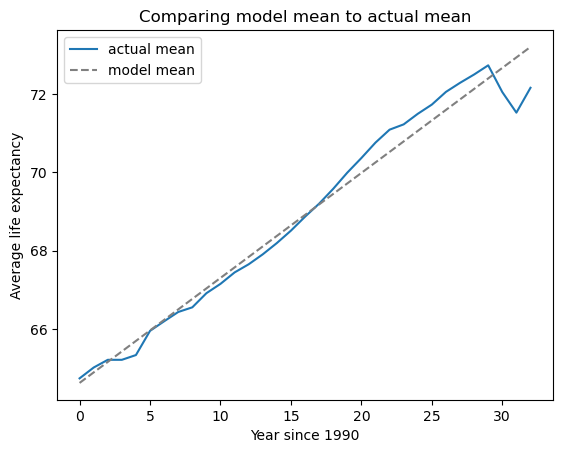

In [7]:
### Use the linear regression fit model to predict the means from the dataset 

#create a dtaframe with the sample variables to plug into the predicted measurements
#We want to know whether the year (x) would predict the life expectancy, so we need to make a predict model based on the years 0-30
#That can also just be the listed series of the years
le_yr_predict= pd.DataFrame()
le_yr_predict['year_since_1990']= gdp_le['year_since_1990'].unique() #make a unique column or else it will put in the number of rows for every country 

#Now make the mean estimate based on the prdediciton from the previous model
le_yr_predict['mean_estimate']= le_yr_model2.predict(le_yr_predict)

#Create a new dataframe of the actual mean per year compared to the predicted model mean
gdp_le= gdp_le.merge(le_yr_predict, left_on='year_since_1990', right_on='year_since_1990', how='left')
compare_mean= gdp_le.groupby('year_since_1990')[['Life_Expectancy', 'mean_estimate']].mean()

#Visualize the difference with a plot 
fig, ax= plt.subplots()
ax.plot(compare_mean['Life_Expectancy'], label='actual mean');
ax.plot(compare_mean['mean_estimate'], label='model mean', linestyle='--', color='0.5');
ax.set_title('Comparing model mean to actual mean')
ax.set_ylabel('Average life expectancy')
ax.set_xlabel('Year since 1990')
ax.legend()

### 1d. Plot the actual values against your model's estimates for the mean life expectancy.

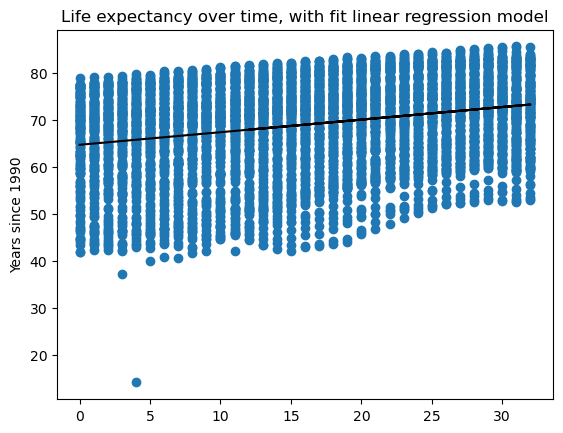

In [8]:
##Visualize with a scatter plot 
fig, ax = plt.subplots()
ax.scatter(gdp_le['year_since_1990'], gdp_le['Life_Expectancy'])
ax.plot(le_yr_predict['year_since_1990'], le_yr_predict['mean_estimate'], color='k')
ax.set_title('Life expectancy over time, with fit linear regression model')
ax.set_ylabel('Life Expectancy (years)')
ax.set_ylabel('Years since 1990')
plt.show()


### 1e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [9]:
#r squared values- put the model variable using the rsquared function
le_yr_model2.rsquared

0.07154748843194658

**response** The rsquared value is 0.072. A rsquared value of 0 means that the plot has no residuals. The prediction line of fit does have very few resisduals, since all values are spread evenly at the top and bottom of the prediction line. Therefore, I would expect the model to have an rsquared value close to 0. The rsquare matches the expected trends, which makes since given the plot!

-----------

## 2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [16]:
#filter out to 2021
gdp_le_21= gdp_le[gdp_le['Year'] == 2021]
gdp_le_21.head()

#make a regression model
model_21= smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_21).fit()

### 2a. What coefficients do you get? Interpret the meaning of those coefficients.

In [17]:
model_21.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

**reponse** The coefficent is 0.000257. So every metric of life expectancys (year?) would increase the GDP_per_capita value by 0.00025 dollars. 

### 2b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [24]:
gdp_le_21['GDP_thousand']= (gdp_le_21['GDP_Per_Capita']/ 1000)
gdp_le_21

#Rerun the fit model with the new column
model_21_thousand= smf.ols("Life_Expectancy ~ GDP_thousand", data=gdp_le_21).fit()
model_21_thousand.params

C:\Users\Mullo\AppData\Local\Temp\ipykernel_43320\1557023728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_21['GDP_thousand']= (gdp_le_21['GDP_Per_Capita']/ 1000)


Intercept       65.949870
GDP_thousand     0.256892
dtype: float64

In [34]:
pc_change= ((model_21_thousand.params.iloc[1]- model_21.params.iloc[1]) / (model_21.params.iloc[1]))*100
print(f'The original coefficent is {model_21.params.iloc[1]}, and the refit coefficent is {model_21_thousand.params.iloc[1]}')
print(f'The refit model changes the coefficent by a {round(pc_change)} percent change')
print('The intercept value does not change')

The original coefficent is 0.00025689174818069836, and the refit coefficent is 0.25689174818069865
The refit model changes the coefficent by a 99900 percent change
The intercept value does not change


### 2c. Are the coefficients statistically significant?

In [36]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           6.81e-32
Time:                        13:20:56   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model_21_thousand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           6.81e-32
Time:                        13:21:13   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       65.9499      0.549    120.225      0.000      64.867      67.033
GDP_thousand     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**response** The coefficent is statistically significant in both models (calculating by thousands), since p value is 0 in both models

### 2d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000? 

In [39]:
est_val= 50000
est_le= model_21.params['Intercept'] + model_21.params['GDP_Per_Capita']*est_val

print(f'The estimated life expectancy for a country whose GDP is {est_val} = {est_le}')

The estimated life expectancy for a country whose GDP is 50000 = 78.79445724641319


In [41]:
est_val= 100000
est_le= model_21.params['Intercept'] + model_21.params['GDP_Per_Capita']*est_val

print(f'The estimated life expectancy for a country whose GDP is {est_val} = {est_le}')

The estimated life expectancy for a country whose GDP is 100000 = 91.63904465544812


### 2e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

C:\Users\Mullo\AppData\Local\Temp\ipykernel_43320\927332914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_21['gdp_mean_est']= gdp_le_pred


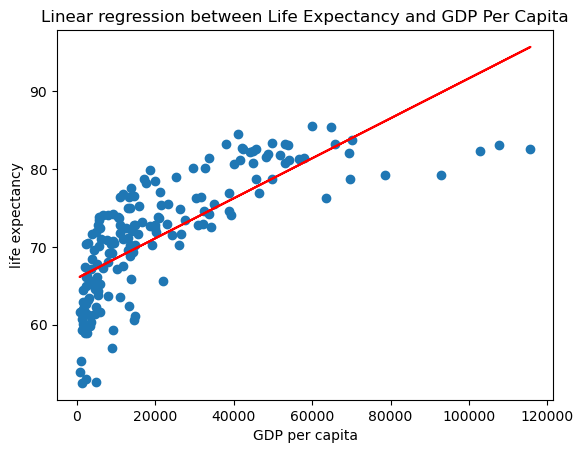

In [59]:
###Make a predictive model 
gdp_le_pred= model_21.predict(gdp_le_21)

#Add the predicted mean values into main dataframe 
gdp_le_21['gdp_mean_est']= gdp_le_pred

#Make a scatterplot of the actual GDP_captia and life expectancy values 
fig, ax= plt.subplots()
ax.scatter(gdp_le_21['GDP_Per_Capita'], gdp_le_21['Life_Expectancy']); 
ax.plot(gdp_le_21['GDP_Per_Capita'],  gdp_le_21['gdp_mean_est'], color='red');
ax.set_title('Linear regression between Life Expectancy and GDP Per Capita');
ax.set_ylabel('life expectancy');
ax.set_xlabel('GDP per capita');

In [60]:
model_21.rsquared

0.5551460546913908

**reponse** The model fit based on the rsquared value is 0.55, suggesting that it is not a good fit. The graph visual shows that the predictd means does not follow the actual data distribution, since much of the points are either over or under estimated (above or below the line). The distribution from the scatter points does not look linear, so likely the model needs to account for the non-linear distribution of the datapoints.

-------------

## 3. Now, fit a model for life expectancy based on the log of gdp per capita.

In [64]:
#Assuming based on 2021 data- make a column for the log calculation
gdp_le_21['log_GDP']= np.log(gdp_le_21['GDP_Per_Capita'])
gdp_le_21

#Create a new model 
model_21_log= smf.ols("Life_Expectancy ~ log_GDP", data=gdp_le_21).fit()

C:\Users\Mullo\AppData\Local\Temp\ipykernel_43320\4177375902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_21['log_GDP']= np.log(gdp_le_21['GDP_Per_Capita'])


### 3a. Inspect the coefficients for this model. Are they statistically significant?

In [65]:
model_21_log.params

Intercept    18.946970
log_GDP       5.589014
dtype: float64

In [66]:
model_21_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           1.06e-48
Time:                        13:55:47   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9470      2.547      7.438      0.000      13.919      23.975
log_GDP        5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**response** The coefficent for log GDP is 5.58, which means that every log dollar GDP increases life expectancy by 5.58 years. This is statistically significant, with a pvalue of 0. 

### 3b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000? 

In [68]:
est_val= 50000
est_le= model_21_log.params['Intercept'] +model_21_log.params['log_GDP']*est_val

print(f'The estimated life expectancy for a country whose GDP is {est_val} = {est_le}')

The estimated life expectancy for a country whose GDP is 50000 = 279469.6393725865


In [70]:
est_val= 100000
est_le= model_21_log.params['Intercept'] +model_21_log.params['log_GDP']*est_val

print(f'The estimated life expectancy for a country whose GDP is {est_val} = {est_le}')

The estimated life expectancy for a country whose GDP is 100000 = 558920.3317751114


### 3c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged method?

-----

## 4. 
Finally, return to the full dataset. a. First, fit a linear regression model for life expectancy based on the log of gdp per capita. b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?